# Importing libraries

In [39]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import warnings
warnings.filterwarnings('ignore')

# <font color = 'red'> Step 1 

# Importing data

In [40]:
df = pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# <font color = 'red'> Step 2

# Perfroming EDA On Data

## Renaming columns

In [41]:
df1 = df.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}, axis = 1)
df1

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# <font color = 'red'> Step 3

## Checking Data

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [43]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


### Checking for Null Values

In [44]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

### Checking for Duplicate Values

In [45]:
df[df.duplicated()].shape

(0, 2)

In [46]:
df[df.duplicated()]

,Delivery Time,Sorting Time


# <font color = 'red'> Step 4

# Checking for Homoscedasticity or Hetroscedasticity

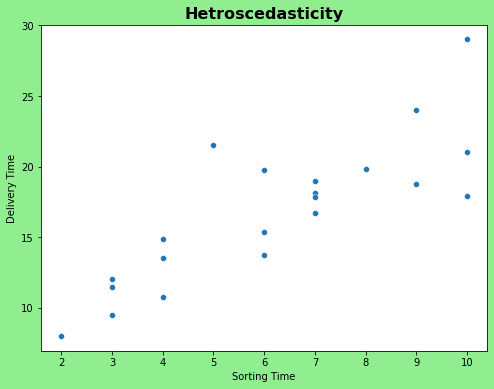

In [47]:
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = df['Sorting Time'], y = df['Delivery Time'])
plt.title('Hetroscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [112]:
df.var()

Delivery Time    25.754619
Sorting Time      6.461905
dtype: float64

## <font color='red'>As you can see in above graph its shows as the Sorting Time Increases Delivery Time also increases with much variation along the way in data there is no such any specific pattern in the variation. but we can't say it's homoscedasticity

# <font color = 'red'> Step 5

# Plotting differente plots of the model to check the regression line 

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [49]:
lm = LinearRegression()

x = df['Sorting Time'].values.reshape(-1,1)
y = df['Delivery Time'].values.reshape(-1,1)

reg_sklearn = lm.fit(x,y)

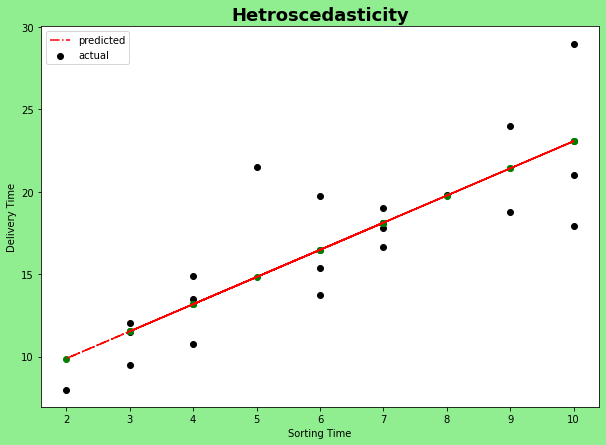

In [50]:
plt.figure(figsize=(10,7), facecolor ='lightgreen')
plt.scatter(df['Sorting Time'], df['Delivery Time'], color = 'black', label='actual')
plt.plot(df['Sorting Time'], reg_sklearn.predict(x), color = 'red', linestyle='-.', label = 'predicted')
plt.scatter(df['Sorting Time'], reg_sklearn.predict(x), color = 'green')
plt.xlabel('Sorting Time')
plt.ylabel("Delivery Time")
plt.title('Hetroscedasticity', fontsize = 18, fontweight = 'bold')
plt.legend(loc='best')
plt.show()

# <font color = 'red'> Step 6

## Checking the Correlation between variables

In [51]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


### <font color='red'>As you can see above there is good correlation between the two variable more than 0.8

# <font color = 'red'> Step 7

### Plotting the data to check for outliers

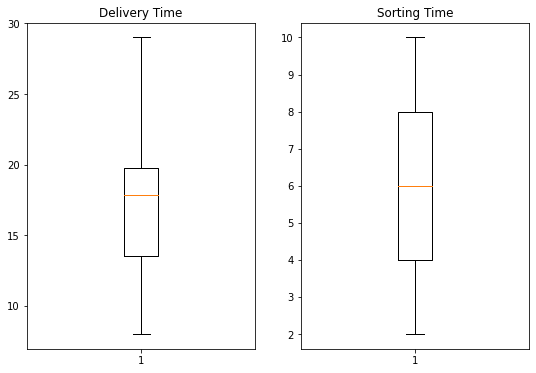

In [52]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(df['Delivery Time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(df['Sorting Time'])
plt.title('Sorting Time')
plt.show()

# <font color='red'> As you can see there are no Outliers in the data 

# <font color = 'red'> Step 8

# Trying different transformation of data to estimate normal distribution and to remove any skewness

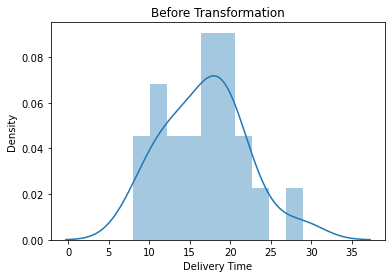

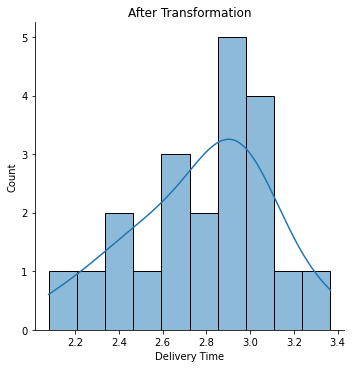

In [53]:
sns.distplot(df['Delivery Time'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['Delivery Time']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

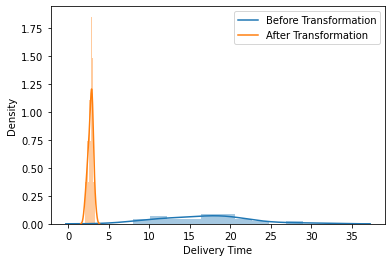

In [54]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['Delivery Time'], bins = 10, kde = True)
sns.distplot(np.log(df['Delivery Time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

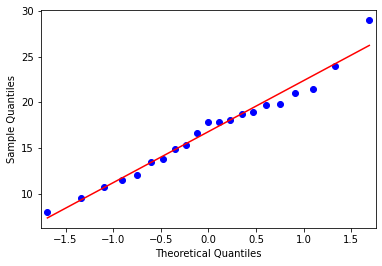

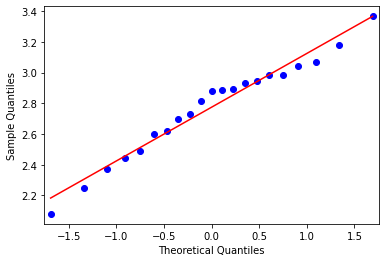

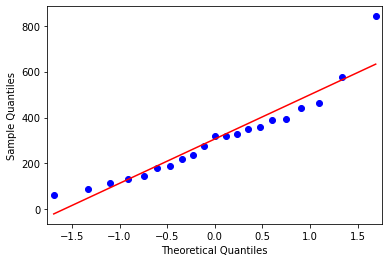

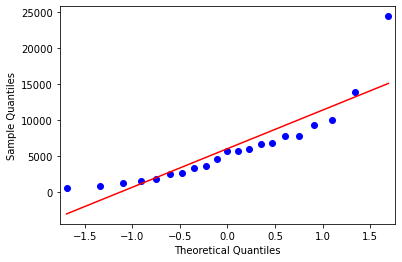

In [55]:
smf.qqplot(df['Delivery Time'], line = 'r')
smf.qqplot(np.log(df['Delivery Time']), line = 'r')
smf.qqplot(np.square(df['Delivery Time']), line = 'r')
smf.qqplot(pow(df['Delivery Time'],3), line = 'r')
plt.show()

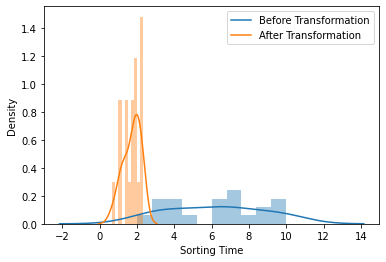

In [56]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['Sorting Time'], bins = 10, kde = True)
sns.distplot(np.log(df['Sorting Time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

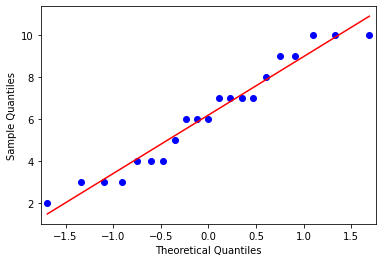

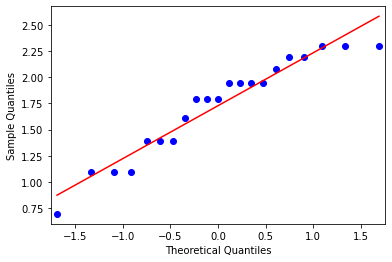

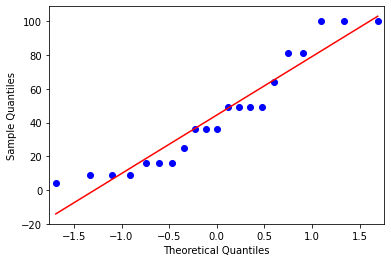

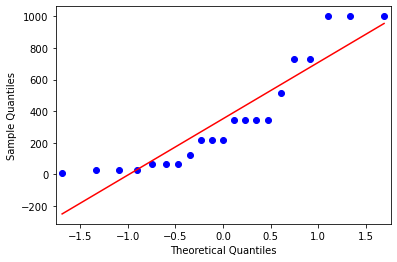

In [57]:
# <font color='red'>Important Note:</font> We only do any data transformation when the data is skewed or not normalsmf.qqplot(df['Sorting Time'], line = 'r')
smf.qqplot(np.log(df['Sorting Time']), line = 'r')
smf.qqplot(np.square(df['Sorting Time']), line = 'r')
smf.qqplot(pow(df['Sorting Time'],3), line = 'r')
plt.show()

# <font color='red'>Important Note:</font> We only do any data transformation when the data is skewed or not normal

# <font color = 'red'> Step 9

# Fitting a Linear Regression Model 

In [58]:
import statsmodels.formula.api as sm
model = sm.ols('Delivery_Time~Sorting_Time', data = df1).fit()

In [59]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 19 Mar 2022   Prob (F-statistic):           3.98e-06
Time:                        11:23:22   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

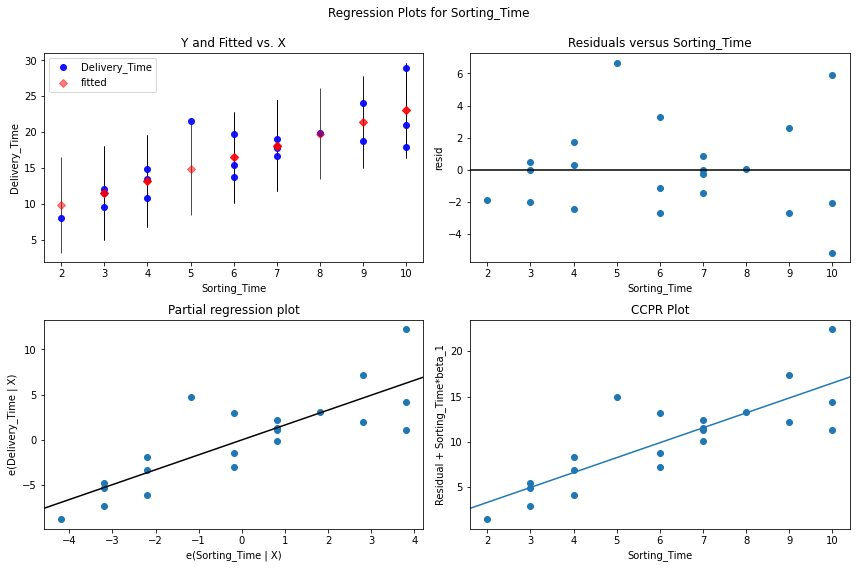

In [60]:
fig = plt.figure(figsize=(12,8))
fig = smf.graphics.plot_regress_exog(model, 'Sorting_Time', fig=fig)

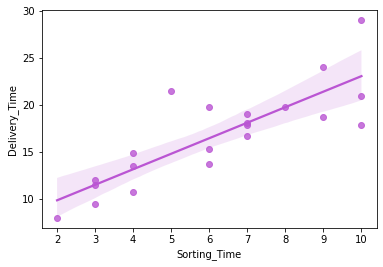

In [114]:
sns.regplot(x = 'Sorting_Time',  y = 'Delivery_Time', data = df1, color = 'mediumorchid')
plt.show()

# Log transformation on dependent variable

In [62]:
model1 = sm.ols('np.log(Delivery_Time)~Sorting_Time', data = df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Sat, 19 Mar 2022   Prob (F-statistic):           1.59e-06
Time:                           11:23:28   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Log transformation on both dependent as well as independent variable

In [64]:
model2 = sm.ols('np.log(Delivery_Time)~np.log(Sorting_Time)', data = df1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Sat, 19 Mar 2022   Prob (F-statistic):           1.60e-07
Time:                           11:23:30   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

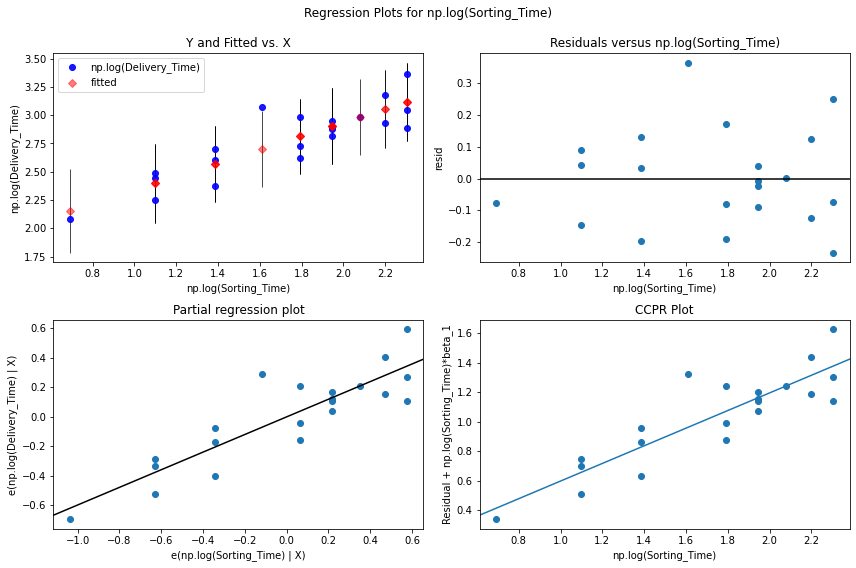

In [65]:
fig = plt.figure(figsize=(12,8))
fig = smf.graphics.plot_regress_exog(model2, 'np.log(Sorting_Time)', fig=fig)

# Log transformation on dependent and independent variable + square transformation on independent variable

In [28]:
model3 = sm.ols('np.log(Delivery_Time)~np.log(Sorting_Time)+np.square(Sorting_Time)', data = df1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.777
Model:                               OLS   Adj. R-squared:                  0.752
Method:                    Least Squares   F-statistic:                     31.28
Date:                   Sat, 19 Mar 2022   Prob (F-statistic):           1.39e-06
Time:                           11:13:41   Log-Likelihood:                 10.496
No. Observations:                     21   AIC:                            -14.99
Df Residuals:                         18   BIC:                            -11.86
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.6279      0.234      6.948      0.000       1.136       2.120
np.log(Sorting_Time)        0.7081      0.200      3.537      0.002       0.287       1.129
np.square(Sorting_Time)    -0.0017      0.003     -0.597      0.558      -0.008       0.004
==============================================================================
Omnibus:                        1.794   Durbin-Watson:                   1.391
Prob(Omnibus):                  0.408   Jarque-Bera (JB):                1.191
Skew:                           0.578   Prob(JB):                        0.551
Kurtosis:                       2.843   Cond. No.                         482.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# <font color = 'red'> Step 10

# Comparing different models with respect to the Root Mean Squared Errors

In [121]:
data = {'model': np.sqrt(model.mse_resid), 'model1': np.exp(np.sqrt(model1.mse_resid)), 'model2': np.exp(np.sqrt(model2.mse_resid)), 'model3' : np.exp(np.sqrt(model3.mse_resid))}
min(data, key=data.get)

'model2'

In [120]:
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', np.exp(np.sqrt(model1.mse_resid)),'\n' 'model2=', np.exp(np.sqrt(model2.mse_resid)),'\n' 'model3=', np.exp(np.sqrt(model3.mse_resid)))

model= 2.9349037688901394 
model1= 1.19187828017602 
model2= 1.168638853398309 
model3= 1.1718096066386987


# <font color='red'>As model2 has the minimum RMSE hence we are going to use model2 to predict our values 

# <font color = 'red'> Step 11

#  Predicting values

In [104]:
predicted = pd.DataFrame()
predicted['Sorting_Time'] = df1.Sorting_Time
predicted['Delivery_Time'] = df1.Delivery_Time
predicted['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(model2.predict(predicted.Sorting_Time)))
predicted

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593


In [103]:
predicted.drop('Predicted_Delivery_Time', axis = 1, inplace = True)

# Trying different models

In [107]:
model4 = sm.ols('np.log(Delivery_Time)~np.square(Sorting_Time)', data = df1).fit()
print(np.sqrt(model4.mse_resid))

0.20090676112901218


In [108]:
model5 = sm.ols('np.square(Delivery_Time)~np.square(Sorting_Time)', data = df1).fit()
print(np.sqrt(model5.mse_resid))

119.76794935553612


In [109]:
model6 = sm.ols('np.log(Delivery_Time)~pow(Sorting_Time,3)', data = df1).fit()
print(np.sqrt(model6.mse_resid))

0.22253159544223386


In [110]:
model7= sm.ols('np.log(Delivery_Time)~Sorting_Time+np.square(Sorting_Time)', data = df1).fit()
print(np.sqrt(model7.mse_resid))

0.16265299971702354


In [111]:
model8= sm.ols('np.log(Delivery_Time)~Sorting_Time+pow(Sorting_Time,3)', data = df1).fit()
print(np.sqrt(model8.mse_resid))

0.16497255619999854


In [113]:
model9 = sm.ols('pow(Delivery_Time,3)~pow(Sorting_Time,3)', data = df1).fit()
print(np.sqrt(model9.mse_resid))

3910.742610153606
